### Load according data

In [154]:
import pandas as pd
import oemof.solph as solph
from co2_emissions import get_co2_emissions
import yaml
# load config
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)


#restore and load energy system
energy_system = solph.EnergySystem()
energy_system.restore('C:\\Users\\ann82611\\ownCloud\\U-Platte\\04_Code\\hydrogen_hub\\h2_hub_minimalschnitt\\h2_hub_dumps', 'h2_hub_dump_1.oemof')

results_main = energy_system.results['main']
results_meta = energy_system.results['meta'] #for costs

# Convert the results to a DataFrame
results = pd.Series(results_main)
results_meta_pd = pd.Series(results_meta)
print(results.info())
#print(results.describe())


<class 'pandas.core.series.Series'>
MultiIndex: 15 entries, ("<oemof.solph.buses._bus.Bus: 'co2_emissions_bus'>", "<oemof.solph.components._sink.Sink: 'co2_emissions'>") to ("<oemof.solph.components._source.Source: 'wind'>", "<oemof.solph.buses._bus.Bus: 'electricity'>")
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
15 non-null     object
dtypes: object(1)
memory usage: 934.0+ bytes
None


## System Performance
The system performance is defined per below consisting of:
* Electricity deliverd to steel mill
* Hydrogen deliverd to steel mill
* Co2 Emissions
* Costs #aufsummierte kosten

Please keep in mind that the definition of the system performance may vary over time and also to the considered system accordingly.

In [155]:
#Schlüssel sind objekte (keine Strings!) 

# get df flows 
flow_el_steel = results.loc[(energy_system.node['electricity'], energy_system.node['steel_mill'])]['sequences']
flow_h2_steel = results.loc[(energy_system.node['h2_bus'],  energy_system.node['steel_mill'])]['sequences']
flow_co2 = get_co2_emissions(energy_system, config)
steel_produced = results.loc[(energy_system.node['steel_mill'],  energy_system.node['steel'])]['sequences']
operating_costs = results_meta_pd['objective']
print(f"Operating Costs: {operating_costs}")

#extract values from df flows
flow_el_steel_values = flow_el_steel['flow']
flow_h2_steel_values = flow_h2_steel['flow']
flow_co2_values = flow_co2['flow']
steel_produced_values = steel_produced['flow']
operating_costs_values = [operating_costs] * (len(flow_el_steel_values))

# Turn into combined DataFrame
system_performance = pd.DataFrame({'flow_co2': flow_co2_values, 'flow_el_steel': flow_el_steel_values, 'flow_h2_steel': flow_h2_steel_values, 'steel_produced': steel_produced_values, 'operating_costs': operating_costs_values})
system_performance['operating_costs'] = system_performance['operating_costs'].abs() *10e-4 # 10e-4 € für Tabellen lesbarkeit absolute value for a positive value of operating costs (negative costs implemented meaning revenue)

# print(f"Operating costs: {system_performance['operating_costs'].head()}")
# print(f"Produced steel Sum: {system_performance['steel_produced'].sum}")
print(system_performance.describe())
print(system_performance.head())


Operating Costs: -2863504.044749004
          flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
count  8760.000000   8.760000e+03         8760.0    8.760000e+03   
mean     55.557988   6.695969e+01         1800.0    4.380000e+01   
std      16.665194   1.421167e-14            0.0    7.105833e-15   
min       5.264909   6.695969e+01         1800.0    4.380000e+01   
25%      45.348056   6.695969e+01         1800.0    4.380000e+01   
50%      53.774118   6.695969e+01         1800.0    4.380000e+01   
75%      68.827016   6.695969e+01         1800.0    4.380000e+01   
max      83.479845   6.695969e+01         1800.0    4.380000e+01   

       operating_costs  
count     8.761000e+03  
mean      2.863504e+03  
std       4.547733e-13  
min       2.863504e+03  
25%       2.863504e+03  
50%       2.863504e+03  
75%       2.863504e+03  
max       2.863504e+03  
                      flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
2019-01-01 00:00:00  49.483318      66.959689 

c:\Users\ann82611\AppData\Local\Programs\Python\Python312\Lib\site-packages\oemof\network\energy_system.py:205: ExperimentalFeatureWarning: The API to access nodes by label is experimental and might change without prior notice.
  warnings.warn(msg, debugging.ExperimentalFeatureWarning)
c:\Users\ann82611\AppData\Local\Programs\Python\Python312\Lib\site-packages\oemof\network\energy_system.py:205: ExperimentalFeatureWarning: The API to access nodes by label is experimental and might change without prior notice.
  warnings.warn(msg, debugging.ExperimentalFeatureWarning)


### Plot System Performance

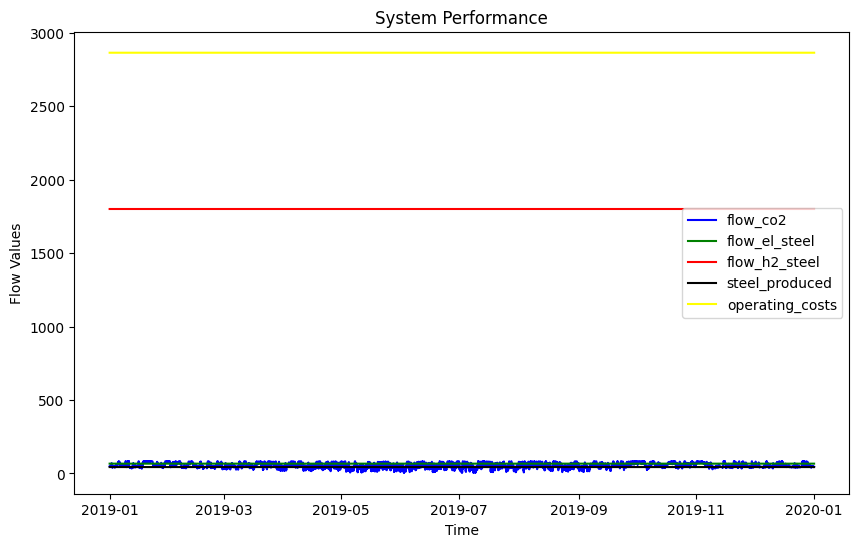

In [156]:
import matplotlib.pyplot as plt

# Erstelle eine Figur und eine Achse
plt.figure(figsize=(10, 6))

# Plotte die drei Zeitreihen
plt.plot(system_performance.index, system_performance['flow_co2'], label='flow_co2', color='blue')
plt.plot(system_performance.index, system_performance['flow_el_steel'], label='flow_el_steel', color='green')
plt.plot(system_performance.index, system_performance['flow_h2_steel'], label='flow_h2_steel', color='red')
plt.plot(system_performance.index, system_performance['steel_produced'], label='steel_produced', color='black')
plt.plot(system_performance.index, system_performance['operating_costs'], label='operating_costs', color='yellow')

# Füge Titel und Beschriftungen hinzu
plt.title('System Performance')
plt.xlabel('Time')
plt.ylabel('Flow Values')

# Füge eine Legende hinzu
plt.legend()

# Zeige die Abbildung an
plt.show()

          flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
count  8760.000000         8760.0         8760.0          8760.0   
mean      0.643011            0.0            0.0             0.0   
std       0.213069            0.0            0.0             0.0   
min       0.000000            0.0            0.0             0.0   
25%       0.512474            0.0            0.0             0.0   
50%       0.620204            0.0            0.0             0.0   
75%       0.812659            0.0            0.0             0.0   
max       1.000000            0.0            0.0             0.0   

       operating_costs  
count           8761.0  
mean               0.0  
std                0.0  
min                0.0  
25%                0.0  
50%                0.0  
75%                0.0  
max                0.0  
                     flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
2019-01-01 00:00:00  0.565345            0.0            0.0             0.0   
2019

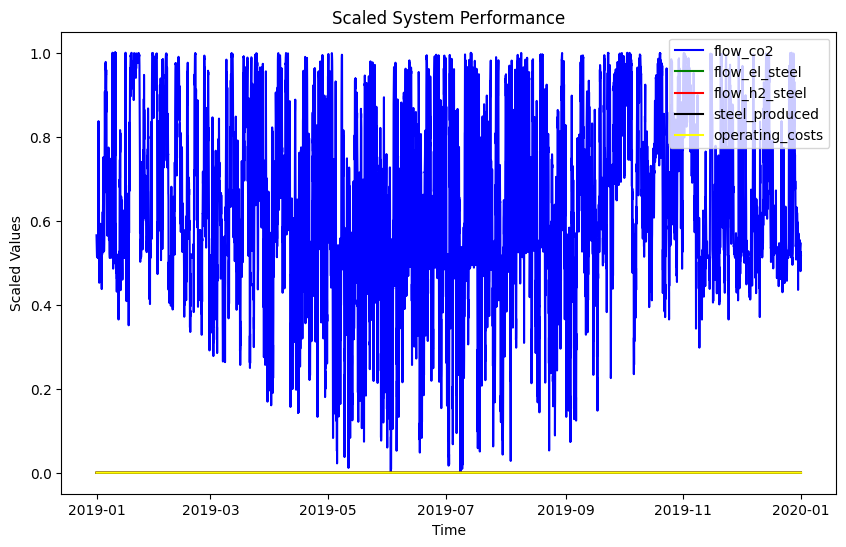

In [157]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# normalized values of system performance
system_performance_normed_values = scaler.fit_transform(system_performance)

# create new df with normalized values
system_performance_normed = pd.DataFrame(system_performance_normed_values, columns=system_performance.columns, index=system_performance.index)

print(system_performance_normed.describe())
print(system_performance_normed.head())

# Plotten der normierten Werte
plt.figure(figsize=(10, 6))
plt.plot(system_performance_normed.index, system_performance_normed['flow_co2'], label='flow_co2', color='blue')
plt.plot(system_performance_normed.index, system_performance_normed['flow_el_steel'], label='flow_el_steel', color='green')
plt.plot(system_performance_normed.index, system_performance_normed['flow_h2_steel'], label='flow_h2_steel', color='red')
plt.plot(system_performance_normed.index, system_performance_normed['steel_produced'], label='steel_produced', color='black')
plt.plot(system_performance_normed.index, system_performance_normed['operating_costs'], label='operating_costs', color='yellow')

# Titel und Beschriftungen
plt.title('Scaled System Performance')
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.legend()

plt.show()


### Combine System Performance into one Indicator

Sum weights: 5
                        flow_co2  flow_el_steel  flow_h2_steel  \
2019-01-01 00:00:00  5653.448183            0.0            0.0   
2019-01-01 01:00:00  5564.561196            0.0            0.0   
2019-01-01 02:00:00  5524.138417            0.0            0.0   
2019-01-01 03:00:00  5323.968144            0.0            0.0   
2019-01-01 04:00:00  5203.762522            0.0            0.0   
...                          ...            ...            ...   
2019-01-04 23:00:00  5398.581643            0.0            0.0   
2019-01-05 00:00:00  5465.984243            0.0            0.0   
2019-01-05 01:00:00  5577.802912            0.0            0.0   
2019-01-05 02:00:00  5979.710934            0.0            0.0   
2019-01-05 03:00:00  6539.150122            0.0            0.0   

                     steel_produced  operating_costs  \
2019-01-01 00:00:00             0.0              0.0   
2019-01-01 01:00:00             0.0              0.0   
2019-01-01 02:00:00     

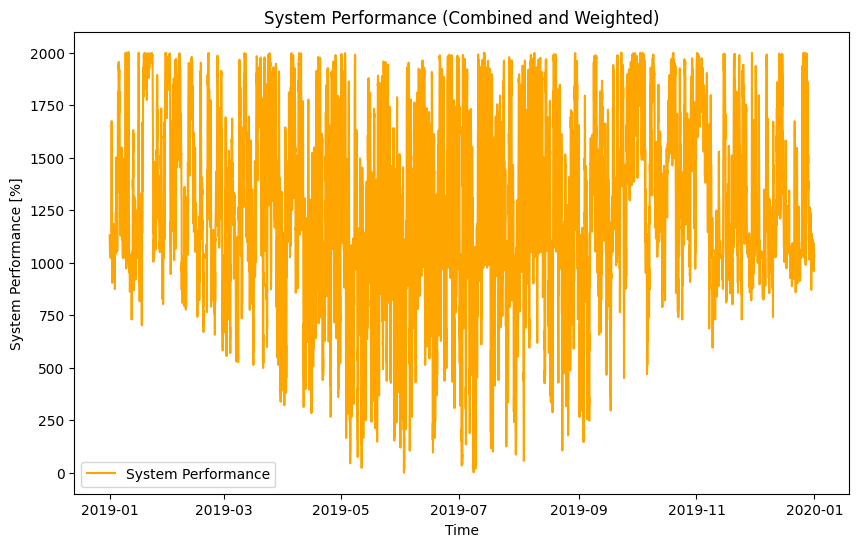

In [160]:
# define weights of each flow
weight_share_flow_co2 = 1
weight_share_flow_el_steel = 1
weight_share_flow_h2_steel = 1
weight_share_steel_produced = 1
weight_share_operating_costs = 1

sum_weights = weight_share_flow_co2 + weight_share_flow_el_steel + weight_share_flow_h2_steel + weight_share_steel_produced + weight_share_operating_costs
print(f"Sum weights: {sum_weights}")

#calculate weights
weight_flow_co2 = weight_share_flow_co2 / sum_weights
weight_flow_el_steel = weight_share_flow_el_steel / sum_weights
weight_flow_h2_steel = weight_share_flow_h2_steel / sum_weights
weight_steel_produced = weight_share_steel_produced / sum_weights
weight_operating_costs = weight_share_operating_costs / sum_weights

#weight dictionary
weights = {'flow_co2': weight_flow_co2, 'flow_el_steel': weight_flow_el_steel, 'flow_h2_steel': weight_flow_h2_steel, 'steel_produced': weight_steel_produced, 'operating_costs': weight_operating_costs}

# add weighted system performance to system performance df
system_performance_normed['weighted_sytem_performance_combined'] = (
    system_performance_normed['flow_co2'] * weight_flow_co2 +
    system_performance_normed['flow_el_steel'] * weight_flow_el_steel +
    system_performance_normed['flow_h2_steel'] * weight_flow_h2_steel +
    system_performance_normed['steel_produced'] * weight_steel_produced +
    system_performance_normed['operating_costs'] * weight_operating_costs
)
system_performance_normed = system_performance_normed * 100 #to display in percent
system_performance_normed_100_dp = system_performance_normed.head(100)
print(system_performance_normed_100_dp)
# print(system_performance['weighted_combined'].head())
# print(system_performance_normed.head(100))

plt.figure(figsize=(10, 6))
plt.plot(system_performance_normed.index, system_performance_normed['weighted_sytem_performance_combined'], label='System Performance', color='orange', linestyle='-')

# Titel und Achsenbeschriftungen
plt.title('System Performance (Combined and Weighted)')
plt.xlabel('Time')
plt.ylabel('System Performance [%]')

# Zeige die Grafik an
plt.legend()
plt.show()


### Calculate one single, comparable Value for System Performance 

In [159]:
total_weighted_combined = system_performance_normed['weighted_sytem_performance_combined'].sum()

print(f"System Performance: {total_weighted_combined}")


System Performance: 112655.56062639726
